<a href="https://colab.research.google.com/github/JagadeeshKrishnaSNunna/Air-Pollution-Monitoring-System/blob/master/Linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def init(num_variables):
  para=[]
  for _ in range(num_variables+1):
    para.append(np.random.randn())
  return np.array(para).reshape(num_variables+1,1)

def forwardPass(parameters,x):
  return np.dot(x,parameters)

def MSE(y,y_hat):
  return (0.5)*np.mean((y_hat-y)**2)

def backpass(x,y,y_hat,parameters,lr):
  m=x.shape[0]
  grad=np.dot(x.T, (y_hat - y)) / m
  parameters=parameters-(lr*grad)
  return parameters

def BIC(y,y_hat,k):
  rss=np.sum((y-y_hat)**2)
  m=len(y)
  L = -0.5 * m * np.log(rss / m)
  return (k * np.log(m) - 2 * L)

def R_square(y,y_hat):
  y_mean=np.mean(y)
  ss_total=np.sum((y-y_mean)**2)
  ssr=np.sum((y-y_hat)**2)
  return 1-(ssr/ss_total)

def Adjusted_R_2(r2,m,k):
  return (1-((1-r2)*(m-1)/(m-k-1)))

def evaluate(y_hat,y,k):
  mse=MSE(y,y_hat)
  r2=R_square(y,y_hat)
  ar2=Adjusted_R_2(r2,len(y),k)
  bic=BIC(y,y_hat,k)
  return {
      "MSE":mse,"R2":r2,"Ar2":ar2,"BIC":bic
  }


def plotFigure(name,values,ylabel):
  plt.xlabel("epochs")
  plt.ylabel(ylabel)
  plt.plot(values,label=ylabel)
  plt.title(name)
  plt.legend()
  plt.show()



In [ ]:
df=pd.read_csv("/content/Cancer_dataset.csv",usecols=['mean_radius', 'mean_perimeter', 'mean_area','mean_smoothness','mean_symmetry',
'mean_fractal_dimension',
'worst_radius',
'worst_area','mean_texture',
'worst_symmetry','tumor_size',
'lymph_node_status'])
print(df.isna().any())
df.fillna(value=df.mean(numeric_only=True),inplace=True)

mean_radius                True
mean_texture               True
mean_perimeter            False
mean_area                 False
mean_smoothness           False
mean_symmetry             False
mean_fractal_dimension    False
worst_radius              False
worst_area                False
worst_symmetry            False
tumor_size                False
lymph_node_status          True
dtype: bool


In [ ]:

lr=0.003
num_predictors=1
parameters=init(num_predictors)
print(parameters)
epochs=20
losses=[]

[[0.09951576]
 [0.22855415]]


In [ ]:
m,n=df.shape
x=df['mean_texture']
y=df['tumor_size']
x_raw=np.array(x).reshape(m,num_predictors)
y=np.array(y).reshape(m,1)
x=np.concatenate((np.array([[1]]*x_raw.shape[0]),x_raw),axis=1)

In [ ]:
for _ in range(epochs):
  y_hat=forwardPass(parameters,x)
  losses.append(MSE(y_hat,y))
  parameters=backpass(x,y,y_hat,parameters,lr)

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


In [ ]:
losses

[5.040777494767021,
 2.899767655037207,
 2.2498429288070287,
 2.052541747163108,
 1.992635858640872,
 1.9744367433215293,
 1.9688978522303469,
 1.9672020147380869,
 1.9666727511711952,
 1.966497607767804,
 1.9664299616512804,
 1.9663949496768072,
 1.9663698469024207,
 1.9663477551004118,
 1.9663265802916001,
 1.9663056868414448,
 1.9662848818004723,
 1.9662641065976454,
 1.9662433434529196,
 1.9662225869684844]

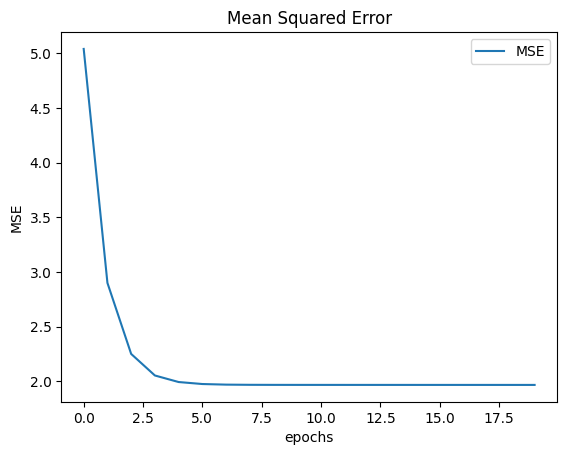

In [ ]:
plotFigure("Mean Squared Error",losses,"MSE")

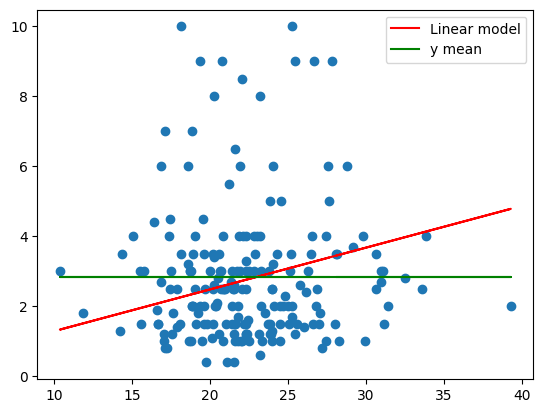

In [ ]:
plt.scatter(x_raw,y)
plt.plot(x_raw,y_hat,color='r',label="Linear model")
plt.plot(x_raw,[y.mean()]*x_raw.shape[0],color='g',label="y mean")
plt.legend(loc="upper right")

In [ ]:
q1_model_metrics=evaluate(y_hat,y,num_predictors)
q1_model_metrics


{'MSE': 1.9662225869684844,
 'R2': -0.05237435133639323,
 'Ar2': -0.05774360823096658,
 'BIC': 276.4020270165063}

---
**Question-2**

---



In [ ]:
x2=df[['mean_texture','lymph_node_status']]
# x2=df[['mean_radius', 'mean_perimeter', 'mean_area','worst_symmetry','lymph_node_status']]
y2=df['tumor_size']
m,n=x2.shape
x2_raw=np.array(x2).reshape(m,n)
y2=np.array(y2).reshape(m,1)
x2=np.concatenate((np.array([[1]]*x2_raw.shape[0]),x2_raw),axis=1)

In [ ]:
lr=0.003
# num_predictors=5
num_predictors=2
parameters2=init(num_predictors)
print(parameters2)
epochs=30
losses2=[]

[[ 0.50333844]
 [-1.82626237]
 [ 1.2868875 ]]


In [ ]:
for _ in range(epochs):
  y2_hat=forwardPass(parameters2,x2)
  losses2.append(MSE(y2_hat,y2))
  parameters2=backpass(x2,y2,y2_hat,parameters2,lr)

In [ ]:
losses2

[807.2925217837975,
 289.1770394546667,
 110.63868243468045,
 48.02263672569799,
 25.161108280452627,
 16.084330356667518,
 11.912688507529301,
 9.589142034708638,
 8.04385113626178,
 6.888080986951655,
 5.968946536620244,
 5.217223901627518,
 4.59499996115853,
 4.077388584515619,
 3.645916896050959,
 3.2859474790695287,
 2.9855280286603434,
 2.734771882925616,
 2.5254568829106945,
 2.3507299787907834,
 2.2048740749209905,
 2.0831179704632117,
 1.9814792599459468,
 1.896633721695463,
 1.8258064682656066,
 1.7666811441785397,
 1.7173241484605342,
 1.6761213855570574,
 1.6417254697874777,
 1.6130116544291]

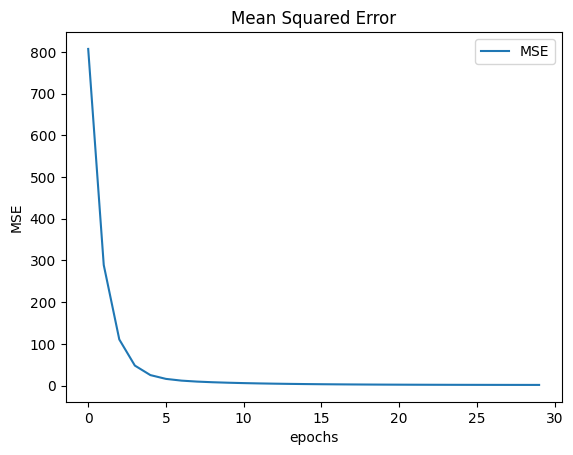

In [ ]:
plotFigure("Mean Squared Error",losses2,"MSE")

In [ ]:
q2_model_metrics=evaluate(y2_hat,y2,num_predictors)
q2_model_metrics

{'MSE': 1.6130116544291,
 'R2': 0.1366734850986253,
 'Ar2': 0.12781885417655992,
 'BIC': 242.4840746492978}

If BIC does not improve, the new variable might be:

✔ Not significantly improving model fit

✔ Redundant (highly correlated with existing variables)

✔ Penalized due to a small sample size

✔ Adding noise instead of useful information


In [ ]:
abs(df.corr()['tumor_size']).sort_values()[-6:]

,tumor_size
mean_radius,0.163221
mean_perimeter,0.166489
worst_symmetry,0.166561
mean_area,0.174491
lymph_node_status,0.485786
tumor_size,1.000000




---
Question3
---



In [ ]:
variables=['mean_radius', 'mean_perimeter', 'mean_area','worst_symmetry','lymph_node_status']
model={}
best_variable=None
best_parameters=[]
best_model_metrics=None
y_step=np.array(df['tumor_size']).reshape(df['tumor_size'].shape[0],1)

choosen_vars=[]
best_choosen_vars=[]
variables_len=1


for _ in range(5):
  current_best_variable=None
  current_best_parameters=[]
  current_best_model_metrics=None
  for var in variables:
    x_step=np.array(df[choosen_vars+[var]])
    x_step=x_step.reshape(x_step.shape[0],variables_len)
    x_step=np.concatenate((np.array([[1]]*x_step.shape[0]),x_step),axis=1)

    for _ in range(epochs):
      X_transpose = x_step.T
      params = np.linalg.inv(X_transpose.dot(x_step)).dot(X_transpose).dot(y_step)
      y_step_hat=forwardPass(params,x_step)
      # params=backpass(x_step,y_step,y_step_hat,params,lr)
    metrics=evaluate(y_step_hat,y_step,variables_len)
    print([choosen_vars+[var]],"-->",metrics['BIC'])
    if(current_best_model_metrics==None or metrics['BIC']<current_best_model_metrics['BIC']):
      current_best_model_metrics=metrics
      current_best_parameters=params
      current_best_variable=var

  choosen_vars.append(current_best_variable)
  variables.remove(current_best_variable)
  if(best_model_metrics==None or current_best_model_metrics['BIC']<=best_model_metrics['BIC']):
    best_model_metrics=current_best_model_metrics
    best_parameters=current_best_parameters
    best_variable=current_best_variable
    best_choosen_vars=([choosen_vars+[current_best_variable]])
  variables_len+=1

[['mean_radius']] --> 260.9478460919833
[['mean_perimeter']] --> 260.7285508364861
[['mean_area']] --> 260.1721631955296
[['worst_symmetry']] --> 260.7236672015429
[['lymph_node_status']] --> 212.99843345078943
[['lymph_node_status', 'mean_radius']] --> 213.14444658420484
[['lymph_node_status', 'mean_perimeter']] --> 213.58420286677247
[['lymph_node_status', 'mean_area']] --> 212.99106928979793
[['lymph_node_status', 'worst_symmetry']] --> 213.3629403891854
[['lymph_node_status', 'mean_area', 'mean_radius']] --> 218.27899243703754
[['lymph_node_status', 'mean_area', 'mean_perimeter']] --> 217.62399052019023
[['lymph_node_status', 'mean_area', 'worst_symmetry']] --> 215.20426762722963
[['lymph_node_status', 'mean_area', 'worst_symmetry', 'mean_radius']] --> 220.33757313410004
[['lymph_node_status', 'mean_area', 'worst_symmetry', 'mean_perimeter']] --> 220.25386143879447
[['lymph_node_status', 'mean_area', 'worst_symmetry', 'mean_perimeter', 'mean_radius']] --> 225.12037601684082


In [ ]:
set(best_choosen_vars[0])

{'lymph_node_status', 'mean_area'}

In [ ]:
best_model_metrics

{'MSE': 1.389784156382367,
 'R2': 0.2561507482601547,
 'Ar2': 0.24852152516538706,
 'BIC': 212.99106928979793}

In [ ]:
variables=['mean_radius', 'mean_perimeter', 'mean_area','mean_smoothness','mean_symmetry',
'mean_fractal_dimension','worst_radius','worst_area','worst_symmetry','lymph_node_status']
model={}
best_variable=None
best_parameters=[]
best_model_metrics=None
y_bstep=np.array(df['tumor_size']).reshape(df['tumor_size'].shape[0],1)

choosen_vars=[]
best_choosen_vars=[]
variables_len=9


for _ in range(5):
  current_best_variable=None
  current_best_parameters=[]
  current_best_model_metrics=None
  for var in variables:
    temp=variables.copy()
    temp.remove(var)
    x_bstep=np.array(df[temp])
    x_bstep=x_bstep.reshape(x_bstep.shape[0],variables_len)
    x_bstep=np.concatenate((np.array([[1]]*x_bstep.shape[0]),x_bstep),axis=1)

    for _ in range(epochs):
      X_transpose = x_bstep.T
      params = np.linalg.inv(X_transpose.dot(x_bstep)).dot(X_transpose).dot(y_step)
      y_bstep_hat=forwardPass(params,x_bstep)
    metrics=evaluate(y_bstep_hat,y_bstep,variables_len)
    print([choosen_vars+[var]],"-->",metrics['BIC'])
    if(current_best_model_metrics==None or metrics['BIC']<current_best_model_metrics['BIC']):
      current_best_model_metrics=metrics
      current_best_parameters=params
      current_best_variable=var

  choosen_vars.append(current_best_variable)
  variables.remove(current_best_variable)
  if(best_model_metrics==None or current_best_model_metrics['BIC']<=best_model_metrics['BIC']):
    best_model_metrics=current_best_model_metrics
    best_parameters=current_best_parameters
    best_variable=current_best_variable
    best_choosen_vars=([choosen_vars+[current_best_variable]])
  variables_len-=1

[['mean_radius']] --> 244.1325858290091
[['mean_perimeter']] --> 244.7777928043476
[['mean_area']] --> 244.39107762127867
[['mean_smoothness']] --> 243.99913163693708
[['mean_symmetry']] --> 244.36755817917134
[['mean_fractal_dimension']] --> 244.3089854242998
[['worst_radius']] --> 245.159511175438
[['worst_area']] --> 244.97863104280373
[['worst_symmetry']] --> 244.61993363254163
[['lymph_node_status']] --> 297.1568987649244
[['mean_smoothness', 'mean_radius']] --> 239.00325886295286
[['mean_smoothness', 'mean_perimeter']] --> 239.63537845572185
[['mean_smoothness', 'mean_area']] --> 239.22055225584734
[['mean_smoothness', 'mean_symmetry']] --> 239.3601386267466
[['mean_smoothness', 'mean_fractal_dimension']] --> 239.02190619004165
[['mean_smoothness', 'worst_radius']] --> 240.00719144516268
[['mean_smoothness', 'worst_area']] --> 239.82663611747788
[['mean_smoothness', 'worst_symmetry']] --> 239.37523727809597
[['mean_smoothness', 'lymph_node_status']] --> 291.90069039005095
[['mean

In [ ]:
best_model_metrics

{'MSE': 1.3626257323056763,
 'R2': 0.27068665539012615,
 'Ar2': 0.251694120374244,
 'BIC': 224.9483546343623}

In [ ]:
choosen_vars

['mean_smoothness',
 'mean_radius',
 'mean_fractal_dimension',
 'mean_symmetry',
 'mean_area']